<a href="https://colab.research.google.com/github/anshuldutt21/KeystrokeDynamics-Model/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
!pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 5.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
import os
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn-dark-palette')
mpl.style.use('seaborn-whitegrid')
%matplotlib inline

# The xgboost package throws a DeprecationWarning which we'll ignore
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
# %pwd

dataset = pd.read_excel('/content/drive/MyDrive/BTP_CMU_XGBoost/DSL-StrongPasswordData.xls')
X = dataset.iloc[:,3:].values
y = dataset.iloc[:,0].values

total_cols = len(dataset.columns)

print(total_cols)
sum_h = 0
sum_DD = 0
sum_UD = 0

dataset_H = pd.DataFrame()
dataset_DD = pd.DataFrame()
dataset_UD = pd.DataFrame()

for i in range(3,total_cols,3):
  dataset_H = pd.concat([dataset_H, dataset.iloc[:,i]], axis = 1)
  if i < total_cols-1:
    dataset_DD = pd.concat([dataset_DD, dataset.iloc[:,i+1]], axis = 1)
    dataset_UD = pd.concat([dataset_UD, dataset.iloc[:,i+2]], axis = 1)

dataset_H = pd.DataFrame(data = dataset_H)
print(np.mean(dataset_H, axis = 1))
print(dataset_UD)

dataset['mean_h'] = np.mean(dataset_H, axis = 1)
dataset['mean_UD'] = np.mean(dataset_UD, axis = 1)
dataset['mean_DD'] = np.mean(dataset_DD, axis = 1)

dataset['std_h'] = np.std(dataset_H, axis = 1)
dataset['std_UD'] = np.std(dataset_UD, axis = 1)
dataset['std_DD'] = np.std(dataset_DD, axis = 1)


dataset

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
34
0        0.115782
1        0.100100
2        0.111109
3        0.105400
4        0.092582
           ...   
20395    0.101364
20396    0.100727
20397    0.083509
20398    0.086264
20399    0.093764
Length: 20400, dtype: float64
       UD.period.t  UD.t.i  UD.i.e  UD.e.five  UD.five.Shift.r  UD.Shift.r.o  \
0           0.2488  0.0605  0.1043     1.0468           1.4909        0.6523   
1           0.2340  0.0589  0.0449     1.1141           0.7133        0.6307   
2           0.0744  0.0560  0.0721     0.9600           0.5311        0.5741   
3           0.1224  0.1436  0.0998     0.9656           1.1651        0.6096   
4           0.1068  0.0781  0.0686     0.7824           0.8213        0.6389   
...            ...     ...     ...        ...              ...           ...   
20395      -0.0199  0.0195 -0.0188    -0.0502           0.1398        0.1285   
20396      -0.0025  0.0238 -0.0280    -0.0404           

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.l,DD.l.Return,UD.l.Return,H.Return,mean_h,mean_UD,mean_DD,std_h,std_UD,std_DD
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1338,0.3509,0.2171,0.0742,0.115782,0.42045,0.54039,0.021482,0.466830,0.468576
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.0839,0.2756,0.1917,0.0747,0.100100,0.33136,0.43400,0.027808,0.344402,0.342794
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1085,0.2847,0.1762,0.0945,0.111109,0.28249,0.39526,0.028438,0.288660,0.283073
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.0845,0.3232,0.2387,0.0813,0.105400,0.35669,0.46450,0.022746,0.389495,0.384902
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.0903,0.2517,0.1614,0.0818,0.092582,0.30023,0.39389,0.024565,0.298835,0.295848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,s057,8,46,0.0884,0.0685,-0.0199,0.1095,0.1290,0.0195,0.0945,...,0.1005,0.2054,0.1049,0.1047,0.101364,0.04833,0.14936,0.014633,0.065422,0.060090
20396,s057,8,47,0.0655,0.0630,-0.0025,0.0910,0.1148,0.0238,0.0916,...,0.1445,0.2206,0.0761,0.1198,0.100727,0.01597,0.11479,0.021316,0.056148,0.062651
20397,s057,8,48,0.0939,0.1189,0.0250,0.1008,0.1122,0.0114,0.0721,...,0.1034,0.2017,0.0983,0.0905,0.083509,0.06028,0.14309,0.013652,0.050273,0.051496
20398,s057,8,49,0.0923,0.1294,0.0371,0.0913,0.0990,0.0077,0.0992,...,0.0979,0.1917,0.0938,0.0931,0.086264,0.04222,0.12780,0.012968,0.067998,0.066233


In [4]:
import numpy as np
import pandas as pd


def extract_pairs(Dataset, only_feature_diffs):
    '''
    This function provides the pairing sequence of each user with all other users.

    Arguments:
        Dataset: A pandas DataFrame that contains  registration data.
        
        only_feature_diffs: a boolean if true will take difference of features from pairing data
    
    Return:
        A pd.DataFrame about pairs of keystroke patterns for all users along with a label value:
                1 -- if that row contains information about two instances of the SAME user;
                0 -- if that row contains information about two instances of DIFFERENT users;
    '''

    user_names = pd.unique(Dataset['subject'])
    num_users = len(user_names)
    feature_names = ['mean_h','mean_UD','mean_DD','std_h','std_UD','std_DD']

    # Extract negative examples (pairs of rows from 2 different users)
    all_pair_DFs = []
    for i in range(num_users - 1):
        for j in range(i + 1, num_users):
            user_name_A, user_name_B = user_names[[i, j]]
            user_A = (Dataset['subject'] == user_name_A)
            user_B = (Dataset['subject'] == user_name_B)
            Data_features_A = Dataset.loc[user_A, feature_names]
            Data_features_B = Dataset.loc[user_B, feature_names]

            DF_pair_data = get_pair_data(
                only_feature_diffs,
                Data_features_A,
                Data_features_B
            )
            all_pair_DFs.append(DF_pair_data)

    DF_negative = pd.concat(all_pair_DFs)
    DF_negative['label'] = 0

    # Now, extract positive examples (pairs of rows from the same user)
    all_pair_DFs = []
    for user_name in user_names:
        this_user_rows = (Dataset['subject'] == user_name)
        Data_features = Dataset.loc[this_user_rows, feature_names]
        DF_pair_data = get_pair_data(
            only_feature_diffs,
            Data_features
        )
        all_pair_DFs.append(DF_pair_data)

    DF_positive = pd.concat(all_pair_DFs)
    DF_positive['label'] = 1

    return pd.concat([DF_negative, DF_positive])


def get_pair_data(only_feature_diffs, DF_data_A, DF_data_B=None):
    '''
    This function creates a pandas Data Frame in which each row has 
    information about on two typing keystroke instances.
    
    Args:
        only_feature_diffs: a boolean if true will take difference of features from pairing data
        DF_data_A: The first pd.DataFrame
        DF_data_B: The second one whose all row pairs will be created
            and added to the resulting frame. 
            If the second frame is None, calculations will be carried out on all pairs of rows within DF_data_A.
    
    returns:
        A pd.DataFrame with information about pairs of instances, comming from,
            DF_data_A and DF_data_B. If DF_data_B is None, (unique) pairs will be
            created from rows within DF_data_A.
    '''
    
    within_A = False
    if DF_data_B is None:
        within_A = True
        DF_data_B = DF_data_A

    # The resulting frame will contain L1 distances between features
    # of two keystroke dynamics only (as opposed to complete feature vectors
    # comming from the two instances)
    DF_pair_data = abs_diff_between_all_row_pairs(DF_data_A, DF_data_B, within_A)

    return DF_pair_data


def abs_diff_between_all_row_pairs(DF_data_A, DF_data_B, within_A):
    '''Function for calculating absolute L1 distances between all pairs of
    rows of frames DF_data_A, and DF_data_B.
    '''

    pairs_diffs = np.abs(
      np.expand_dims(DF_data_A, 0) - np.expand_dims(DF_data_B, 1)
    )

    num_examples, num_features = DF_data_A.shape
    
    if within_A:
        # Keep unique pairs within DF_data_A
        pairs_within = [pairs_diffs[i, i+1:] for i in range(num_examples-1)]
        pair_data = np.concatenate(pairs_within)
    else:
        # Take all pairs of rows from DF_data_A and DF_data_B
        pair_data = np.reshape(pairs_diffs, [-1, num_features])

    return pd.DataFrame(pair_data, columns=['mean_h','mean_UD','mean_DD','std_h','std_UD','std_DD'])

In [5]:
%pwd
%cd '/content/drive/MyDrive/BTP_CMU_XGBoost/'

dataset_feature_names = ['subject','mean_h','mean_UD','mean_DD','std_h','std_UD','std_DD']
dataset_features = dataset.loc[:,dataset_feature_names]

dataset_reg = pd.DataFrame(columns = dataset_features.columns)
dataset_login = pd.DataFrame(columns = dataset_features.columns)

for i in range(0,20):
  dataset_reg = dataset_reg.append(dataset_features.loc[400*i:400*i+20])
  dataset_login = dataset_login.append(dataset_features.loc[400*i+6:400*(i+1)])

DF_train_all_pairs = extract_pairs(dataset_reg, only_feature_diffs = True)
DF_train_all_pairs = DF_train_all_pairs.sample(frac=1)
print(DF_train_all_pairs)

DF_train_all_pairs
dataset_login

/content/drive/MyDrive/BTP_CMU_XGBoost
       mean_h  mean_UD  mean_DD     std_h    std_UD    std_DD  label
368  0.046491  0.14926  0.10226  0.000923  0.061127  0.062648      0
94   0.004618  0.05793  0.05111  0.003282  0.109986  0.093488      0
337  0.005464  0.10666  0.10961  0.001417  0.043099  0.047811      0
431  0.018964  0.02557  0.04706  0.003701  0.009196  0.012183      0
269  0.014836  0.01536  0.02888  0.007873  0.035895  0.033855      0
..        ...      ...      ...       ...       ...       ...    ...
352  0.033336  0.04880  0.01342  0.002039  0.097823  0.105642      0
84   0.024745  0.08583  0.11410  0.000776  0.235986  0.241062      0
230  0.012718  0.08325  0.10201  0.010401  0.077309  0.075701      0
90   0.026982  0.28975  0.31637  0.010511  0.235586  0.230970      0
235  0.026018  0.32700  0.30208  0.001179  0.075150  0.083590      0

[87990 rows x 7 columns]


,subject,mean_h,mean_UD,mean_DD,std_h,std_UD,std_DD
6,s002,0.094764,0.25875,0.35409,0.017316,0.347445,0.340156
7,s002,0.094845,0.23358,0.33112,0.021615,0.314156,0.323263
8,s002,0.089427,0.22004,0.31207,0.017378,0.279043,0.271287
9,s002,0.102218,0.21274,0.31652,0.022379,0.251515,0.241665
10,s002,0.096464,0.22213,0.32032,0.026591,0.252990,0.238383
...,...,...,...,...,...,...,...
7996,s025,0.083945,0.15347,0.23488,0.011551,0.142624,0.145843
7997,s025,0.091918,0.30241,0.38979,0.024971,0.292201,0.295049
7998,s025,0.090473,0.39974,0.48947,0.016390,0.499132,0.498921
7999,s025,0.092718,0.26949,0.35918,0.019308,0.236796,0.240073


In [15]:
from copy import deepcopy
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix

feature_names = ['mean_h','mean_UD','mean_DD','std_h','std_UD','std_DD']

def custom_cross_val_auc_score(estimator, DF_registration,
                               num_folds=4, seed=0):
    """This function  performs cross-validation of a model identifying
    whether two keystroke dynamics come from the same user.
        
    Args:
        estimator: an object supplying the estimator.fit, and estimator.predict_proba
            methods (preferably: an object of the class sklearn.pipeline.Pipeline
            class), but also two attributes: estimator.only_feature_diffs, and
            estimator.feature_names.
    
        DF_registration: a pd.DataFrame that should contain only registration
            data.
            
        num_folds: the number of folds for the cross validation split (the "k"
            in "k-fold cross-validation").
            
        seed: a random numbe generator seed (passed to np.random.seed) to ensure
            reproducibility of the results.
        
    Returns:
        (auc_scores, best_classifier): a list of AUC scores, and the classifier
            that produced the best AUC.
    """
    user_names = DF_registration['subject'].unique()
    only_feature_diffs = estimator.only_feature_diffs
    cv = KFold(num_folds)
    np.random.seed(seed)
    cv_iter = list(cv.split(user_names))
    print(cv_iter)
    auc_scores = []
    best_auc_score = -100000
    best_classifier = None
    best_y_true = None
    best_y_pred = None
    for train_user_names_selector, valid_user_names_selector in cv_iter:
        if len(valid_user_names_selector) == 1:
            print('Ignoring a fold with a single validation user'
                  ' (consider lowering the value of `num_folds`)')
            continue
        estimator_copy = deepcopy(estimator)
        train_user_names = user_names[train_user_names_selector]
        DF_registration_train = DF_registration.query('subject in @train_user_names')
        DF_registration_valid = DF_registration.query('subject not in @train_user_names')
        DF_train = extract_pairs(DF_registration_train, feature_names)
        DF_valid = extract_pairs(DF_registration_valid, feature_names)

        DF_train = DF_train.sample(frac=1)

        y = DF_train['label']
        X_train = DF_train.drop('label', 1)
        
        estimator_copy.fit(X_train, y)
        
        print(DF_valid)
        X_valid = DF_valid.drop('label', 1)
        y_pred = estimator_copy.predict_proba(X_valid)
        y_predclass = estimator_copy.predict(X_valid)
        # print(y_pred)
        if y_pred.shape[1] == 2:
            y_pred = y_pred[:, 1]

        # Probability of data belonging to the same user
        y_true = DF_valid['label']
        # print(y_true)
        try:
          auc_score = roc_auc_score(y_true, y_pred)
        
        except:
          pass
        print("auc score")
        print(auc_score)
        # print("Confusion Matrix")
        # plot_confusion_matrix(estimator_copy, X_valid, y_pred)
        
        fpr, tpr, thresholds = metrics.roc_curve(y_true, y_predclass)
        fnr = 1-tpr
        print(accuracy_score(y_true, y_predclass))
        print(confusion_matrix(y_true, y_predclass, normalize='all'))
        print("FPR OR FAR", fpr)
        print("FRR OR FNR", fnr)
        roc_auc = metrics.auc(fpr, tpr)
        display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
        display.plot()
        plt.show()
        
        if auc_score > best_auc_score:
            best_auc_score = auc_score
            best_estimator = estimator_copy
            best_y_true = y_true
            best_y_pred = y_pred
        auc_scores.append(auc_score)

    return auc_scores, best_estimator, best_y_true, best_y_pred, X_train, y

[(array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), array([0, 1, 2, 3, 4])), (array([ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), array([5, 6, 7, 8, 9])), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 15, 16, 17, 18, 19]), array([10, 11, 12, 13, 14])), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([15, 16, 17, 18, 19]))]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


       mean_h  mean_UD  mean_DD     std_h    std_UD    std_DD  label
0    0.005345  0.18838  0.19719  0.002351  0.265722  0.281588      0
1    0.010336  0.09929  0.09080  0.008677  0.143293  0.155805      0
2    0.000673  0.05042  0.05206  0.009307  0.087552  0.096084      0
3    0.005036  0.12462  0.12130  0.003615  0.188386  0.197914      0
4    0.017855  0.06816  0.05069  0.005434  0.097727  0.108859      0
..        ...      ...      ...       ...       ...       ...    ...
205  0.003818  0.03875  0.03452  0.001759  0.038915  0.034286      1
206  0.004545  0.01122  0.01724  0.001478  0.043263  0.035396      1
207  0.009200  0.03921  0.02872  0.003180  0.057454  0.050978      1
208  0.000836  0.01168  0.01144  0.003461  0.061803  0.052089      1
209  0.008364  0.02753  0.01728  0.000281  0.004349  0.001110      1

[5460 rows x 7 columns]
auc score
0.7940346614836411
0.8071428571428572
[[0.8025641  0.00512821]
 [0.18772894 0.00457875]]
FPR OR FAR [0.         0.00634921 1.        ]
FR

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


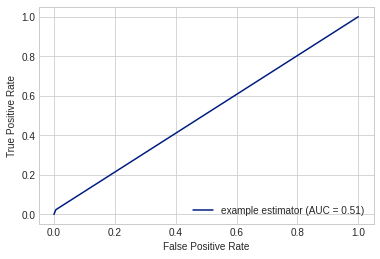

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


       mean_h  mean_UD  mean_DD     std_h    std_UD    std_DD  label
0    0.023373  0.03395  0.05391  0.005546  0.031976  0.023831      0
1    0.023009  0.01614  0.00883  0.007285  0.019207  0.017872      0
2    0.023009  0.02899  0.00824  0.000764  0.028668  0.029381      0
3    0.023364  0.00730  0.01418  0.005869  0.052118  0.057026      0
4    0.025382  0.04678  0.02105  0.003011  0.014399  0.008646      0
..        ...      ...      ...       ...       ...       ...    ...
205  0.003791  0.01381  0.01606  0.004317  0.071431  0.069830      1
206  0.005909  0.03208  0.03560  0.005139  0.066587  0.064588      1
207  0.001255  0.00028  0.00118  0.004302  0.027609  0.030427      1
208  0.003373  0.01799  0.02072  0.005123  0.022766  0.025185      1
209  0.002118  0.01827  0.01954  0.000821  0.004843  0.005242      1

[5460 rows x 7 columns]
auc score
0.8805695929165317
0.8111721611721612
[[0.8043956  0.0032967 ]
 [0.18553114 0.00677656]]
FPR OR FAR [0.         0.00408163 1.        ]
FR

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


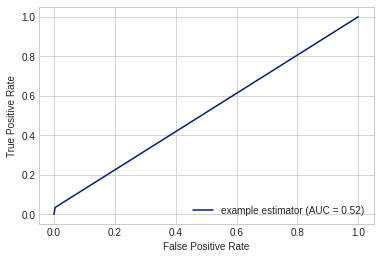

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


       mean_h  mean_UD  mean_DD     std_h    std_UD    std_DD  label
0    0.026518  0.21014  0.23269  0.008093  0.050684  0.049588      0
1    0.024127  0.21977  0.23853  0.005600  0.068686  0.068235      0
2    0.028727  0.30508  0.32945  0.004955  0.182848  0.186349      0
3    0.034555  0.31337  0.34049  0.001068  0.179058  0.174388      0
4    0.028355  0.24056  0.26674  0.004307  0.028457  0.033037      0
..        ...      ...      ...       ...       ...       ...    ...
205  0.000773  0.01322  0.01660  0.000279  0.028675  0.029186      1
206  0.000600  0.00848  0.00793  0.000250  0.045396  0.045746      1
207  0.001691  0.04219  0.04207  0.000145  0.034408  0.040492      1
208  0.000318  0.02049  0.01754  0.000384  0.051128  0.057052      1
209  0.001373  0.02170  0.02453  0.000529  0.016720  0.016560      1

[5460 rows x 7 columns]
auc score
0.8730095022135839
0.8076923076923077
[[0.80769231 0.        ]
 [0.19230769 0.        ]]
FPR OR FAR [0. 1.]
FRR OR FNR [1. 0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


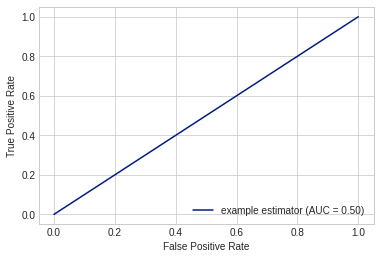

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


       mean_h  mean_UD  mean_DD     std_h    std_UD    std_DD  label
0    0.029973  0.07936  0.10911  0.013166  0.337146  0.330640      0
1    0.032445  0.24349  0.21203  0.009412  0.021486  0.047106      0
2    0.031155  0.22608  0.19619  0.007829  0.018940  0.002267      0
3    0.031191  0.31355  0.28286  0.002108  0.065476  0.075124      0
4    0.029436  0.32924  0.29905  0.001668  0.040766  0.055347      0
..        ...      ...      ...       ...       ...       ...    ...
205  0.000782  0.04509  0.04719  0.000954  0.044774  0.046410      1
206  0.001027  0.01324  0.01240  0.006707  0.005016  0.007198      1
207  0.002091  0.02232  0.02349  0.002601  0.076330  0.075313      1
208  0.003900  0.05417  0.05828  0.005060  0.116088  0.114525      1
209  0.001809  0.03185  0.03479  0.007661  0.039758  0.039212      1

[5460 rows x 7 columns]
auc score
0.9146153763092538
0.8091575091575092
[[0.80769231 0.        ]
 [0.19084249 0.0014652 ]]
FPR OR FAR [0. 0. 1.]
FRR OR FNR [1.         0.9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


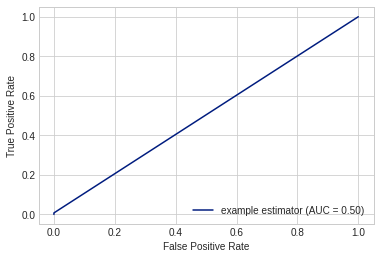

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[17:13:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

In [16]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

params = { 'max_depth': [3, 4, 5, 6, 8, 10],
           'learning_rate': np.arange(0.01, 1, 0.02),
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.6, 1, 0.1),
           'reg_alpha': [1e-5, 1e-4, 1e-2, 1, 10],
           'reg_lambda': [1e-5, 1e-4, 1e-2, 1, 10],
           'n_estimators': [100, 500, 1000]
          }

best_params = { 'max_depth': 5,
           'learning_rate': 0.049999999999999996,
           'subsample': 0.7,
           'colsample_bytree': 0.7,
           'reg_alpha': 1,
           'reg_lambda': 1e-5,
           'n_estimators': 500
          }


xgb_pipe = Pipeline([
    ('XGBClassifier', XGBClassifier()),
])

# We're setting the following attributes manually;
# they will be needed in the `custom_cross_val_auc_score`, and 
# `test_user_verification` functions, that's why I prefer
# to have them as attributes of a Pipeline
xgb_pipe.only_feature_diffs = True
xgb_pipe.feature_names = ['mean_h','mean_UD','mean_DD','std_h','std_UD','std_DD']


scores, best_xgb_pipe, y_true, y_pred, DF_train, DF_y = custom_cross_val_auc_score(
    xgb_pipe,
    dataset_reg
)

# print("SCORES:")
# print(scores)

DF_reg_train = extract_pairs(dataset_reg, feature_names)
DF_y_train = DF_reg_train['label']

xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)

clf.fit(DF_reg_train, DF_y_train)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

plt.hist(scores, range=(0, 1), bins=20);
xgb_classifier = best_xgb_pipe.steps[-1][1]
plot_importance(xgb_classifier);



Streaming output truncated to the last 5000 lines.
18425  0.0793  0.17728  0.25293  0.027864  0.211101  0.207071
230
         mean_h  mean_UD  mean_DD     std_h    std_UD    std_DD
18426  0.093173  0.09106  0.18258  0.034173  0.135296  0.136013
231
         mean_h  mean_UD  mean_DD     std_h    std_UD    std_DD
18427  0.093636  0.08483  0.17815  0.029223  0.122129  0.117597
232
         mean_h  mean_UD  mean_DD    std_h    std_UD    std_DD
18428  0.097509  0.07413  0.17031  0.02745  0.097711  0.094144
233
         mean_h  mean_UD  mean_DD     std_h    std_UD    std_DD
18429  0.093473  0.07303  0.16406  0.031593  0.086262  0.084763
234
         mean_h  mean_UD  mean_DD     std_h    std_UD    std_DD
18430  0.092891  0.07588  0.16706  0.024236  0.090582  0.085355
235
         mean_h  mean_UD  mean_DD     std_h    std_UD    std_DD
18431  0.094845  0.11226  0.20767  0.025155  0.145477  0.137716
236
         mean_h  mean_UD  mean_DD     std_h   std_UD    std_DD
18432  0.096445  0.06074  0.15

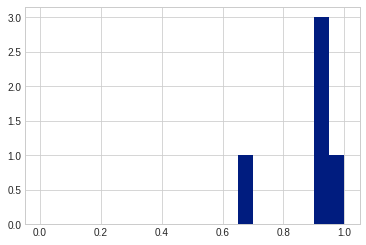

In [ ]:

def regist_vs_one_predictions(DF_regist, DF_one_row, pipe):
    """Function for making predictions for all pairs of rows
    between the registration data (DF_regist), and the singular
    row that needs to be verified (DF_one_row).
    
    Predictions are carried out by the pipe object, and the final
    prediction is taken to be the mean of all predictions.
    
    TODO(3): can we do better? Can we utilize the information
    about how similar/dissimilar the DF_one_row is to the rows
    in DF_regist? Maybe a different statistic (max, min) works
    better? 
    """
    DF_pair_data = get_pair_data(
        pipe.only_feature_diffs,
        DF_regist,
        DF_one_row,
    )

    y_pred = pipe.predict_proba(DF_pair_data)

    if y_pred.shape[1] == 2:
        y_pred = y_pred[:, 1]
        
    return np.mean(y_pred)  # TODO(3): can we do better?


def test_user_verification(pipe, dataset_features):
    """Function for testing the pairwise model, by checking whether
    new keystroke dynamics match those provided during registration.
    
    Args:
        pipe: Pipeline for performing the matching;
            it MUST have attributes only_feature_diffs, and feature_names,
            which are required to produce a frame with the right columns
            for pipe.
            
        test_user_names: a list of user names, which will be used for
            testing.
            
        DF_whole: a pd.DataFrame with both registration, and test rows.
            
    Returns:
        A list of AUC scores calculated from the verification.
    """
    feature_names = ['mean_h','mean_UD','mean_DD','std_h','std_UD','std_DD']

    only_feature_diffs = pipe.only_feature_diffs
    
    auc_scores = []
    dataset_reg_test = pd.DataFrame(columns = dataset_features.columns)
    dataset_login_test = pd.DataFrame(columns = dataset_features.columns)
    

    for i in range(40,50):
      # For a particular user i - registration dataset
      dataset_reg_test = pd.DataFrame(columns = dataset_features.columns)
      dataset_reg_test = dataset_reg_test.append(dataset_features.loc[400*i:400*i+9])
      current_subject = dataset_reg_test.iat[0,0]
      print(current_subject)
      dataset_reg_test = dataset_reg_test[feature_names]

      for j in range(40,50):
        # Contains registration and imposter data
        dataset_login_test = dataset_login_test.append(dataset_features.loc[400*j+100:400*j + 249])
        # print(dataset_login_test.iat[j, 0])

      num_rows = dataset_login_test.shape[0]
      print(num_rows)

      preds = []
      trues = []
      for row_number in range(num_rows):
          print(row_number)
          if(dataset_login_test.iat[row_number, 0] == current_subject):
            trues.append(1)
          else:
            trues.append(0)

          DF_one_row = dataset_login_test.iloc[[row_number]]
          DF_one_row = DF_one_row[feature_names]
          print(DF_one_row)
          pred = regist_vs_one_predictions(dataset_reg_test, DF_one_row, pipe)
          preds.append(pred)

      print(preds)
      print(trues)
      auc_score = roc_auc_score(trues, preds)
      auc_scores.append(auc_score)
      
      msg = 'AUC score: {:.2f} for user "{}"'.format(auc_score, i)
      if auc_score <= 0.5:
          msg += ' (definitely wrong)'
      print(msg)
        
    print('*** Mean AUC score: {:.4f} ***'.format(np.mean(auc_scores)))
    return auc_scores


print('XGB pipeline')
scores = test_user_verification(best_xgb_pipe, dataset_features)
plt.hist(scores, range=(0, 1), bins=20);